In [1]:
from sampstrats import GaussianPRM
import random
import math
import copy
import heapq
import numpy as np
import networkx as nx
import IPPRMBase
import matplotlib.pyplot as plt
from IPPerfMonitor import IPPerfMonitor
import IPTestSuite

In [2]:
def basicPRMVisualize(graph, collChecker, solution, nodeSize=300.0, ax=None):
    # get a list of posiations of all nodes by returning the content of the attribute 'pos'
    pos = nx.get_node_attributes(graph,'pos')
    
    # draw graph (nodes colorized by degree)
    nx.draw_networkx_nodes(graph, pos,  cmap=plt.cm.Blues, ax = ax, node_size=nodeSize)
    nx.draw_networkx_edges(graph,pos,
                                ax = ax
                                )
    
   
    

    collChecker.drawObstacles(ax)
    
    
    # draw nodes based on solution path
    Gsp = nx.subgraph(graph,solution)
    nx.draw_networkx_nodes(Gsp,pos,
                            node_size=300,
                             node_color='g',  ax = ax)
        
    # draw edges based on solution path
    nx.draw_networkx_edges(Gsp,pos,alpha=0.8,edge_color='g',width=10,  ax = ax)
        
    # draw start and goal
    if "start" in graph.nodes(): 
        nx.draw_networkx_nodes(graph,pos,nodelist=["start"],
                                   node_size=300,
                                   node_color='#00dd00',  ax = ax)
    if "goal" in graph.nodes():
        nx.draw_networkx_nodes(graph,pos,nodelist=["goal"],
                                   node_size=300,
                                   node_color='#DD0000', ax = ax)

Planning:  Entrances
Failed tuple indices must be integers or slices, not str
Planning:  KIT
Failed tuple indices must be integers or slices, not str
Planning:  Inside
Failed tuple indices must be integers or slices, not str
Planning:  SSL
Failed tuple indices must be integers or slices, not str
Planning:  Ring
Failed tuple indices must be integers or slices, not str
Planning:  Hemispheres
Failed tuple indices must be integers or slices, not str
Planning:  Hammerhead
Failed tuple indices must be integers or slices, not str
Planning:  Zigzag
Failed tuple indices must be integers or slices, not str
Planning:  Spiral
Failed tuple indices must be integers or slices, not str
Planning:  medium
Failed tuple indices must be integers or slices, not str
Planning:  medium2
Failed tuple indices must be integers or slices, not str
Planning:  L-square
Failed tuple indices must be integers or slices, not str
Planning:  Teeth
Failed tuple indices must be integers or slices, not str
Planning:  Gearshif

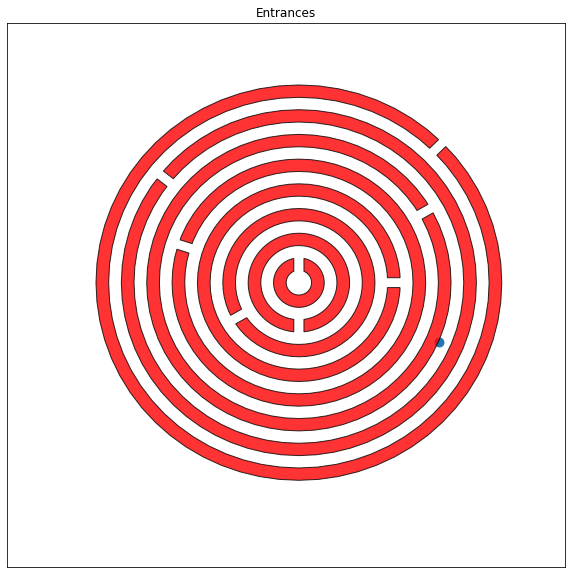

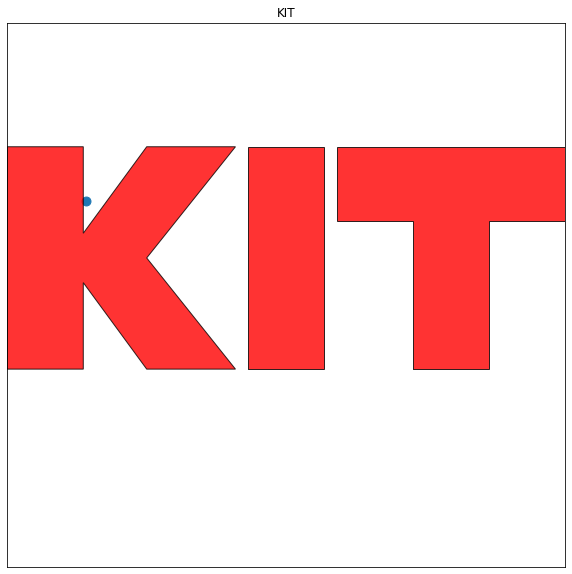

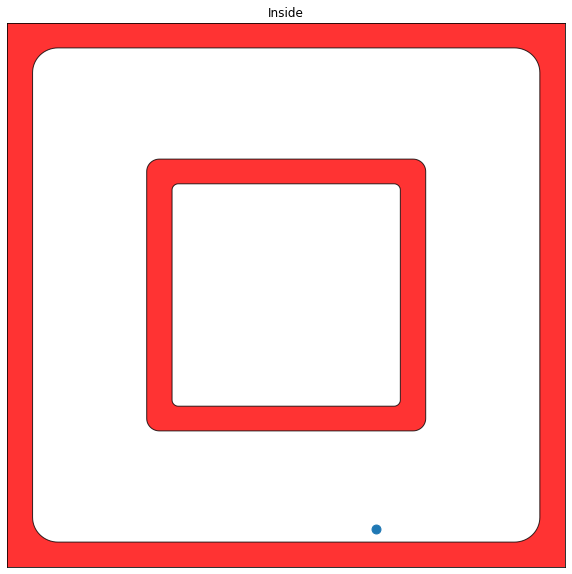

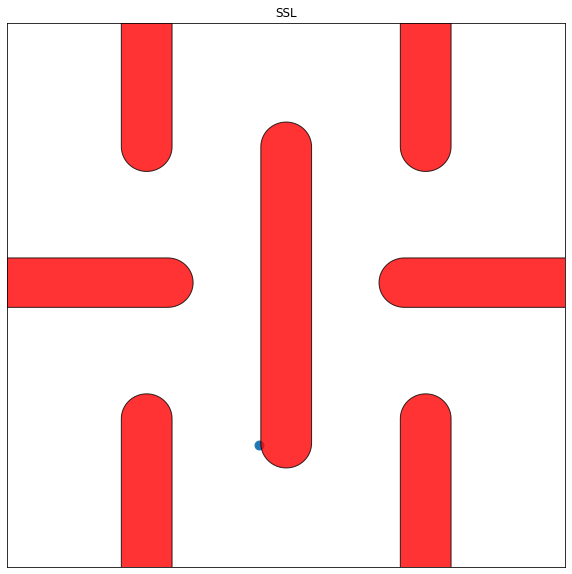

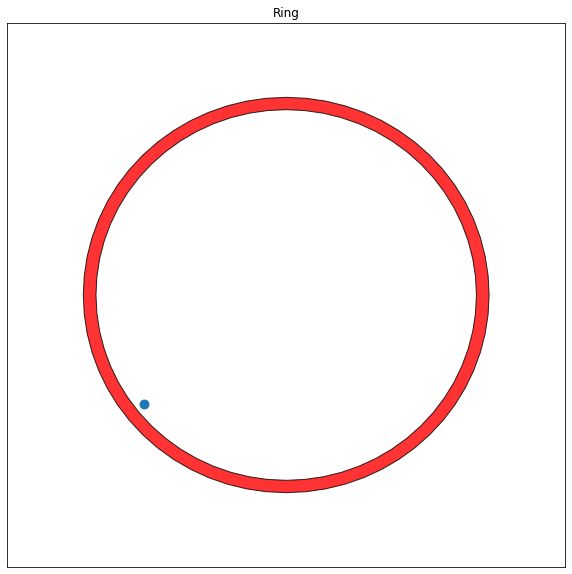

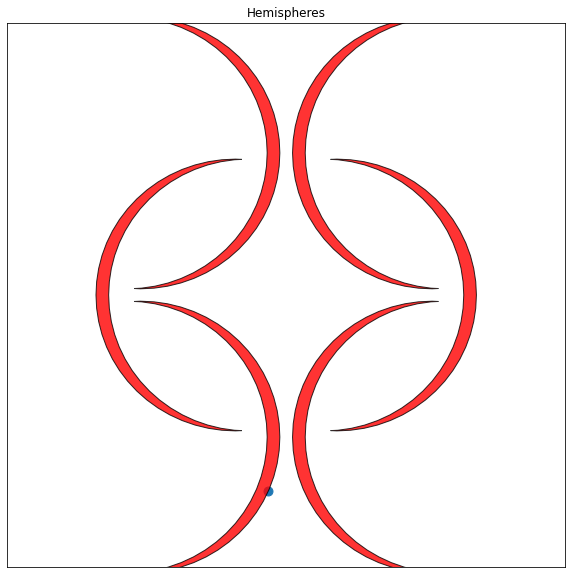

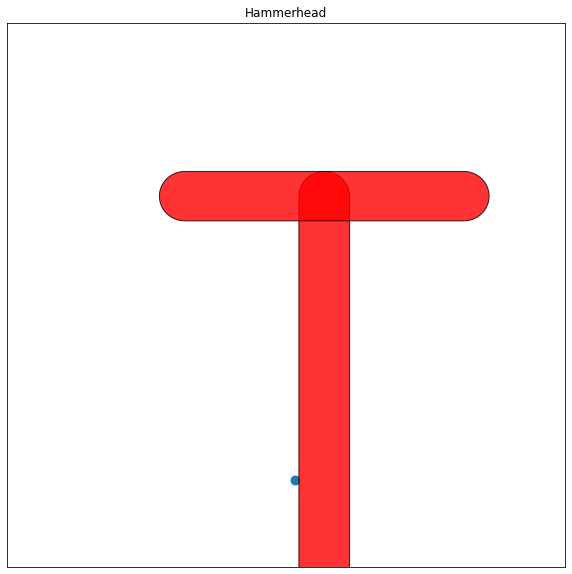

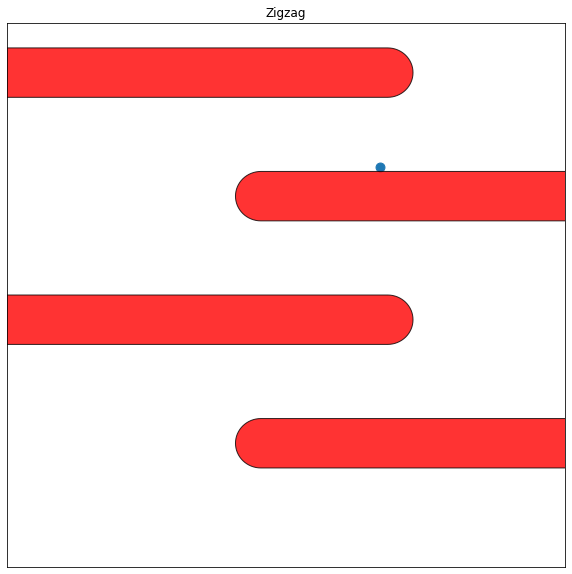

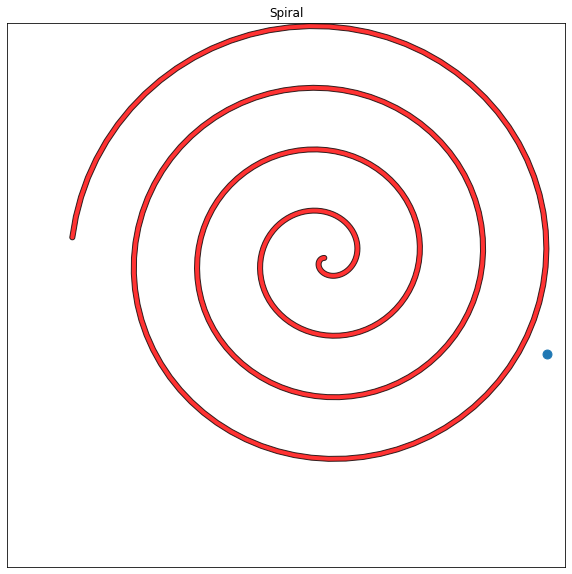

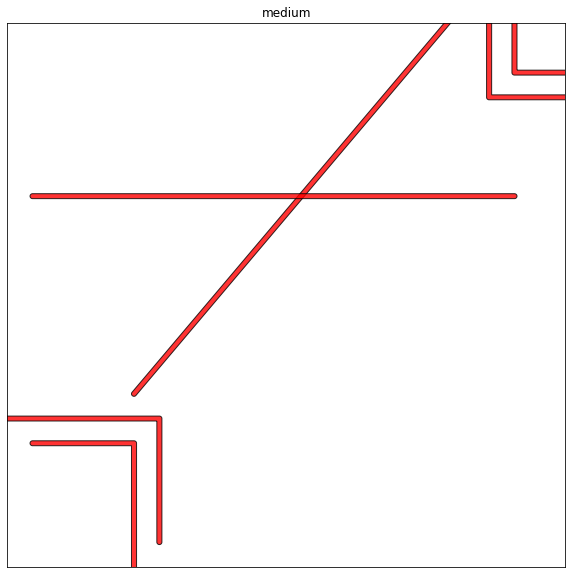

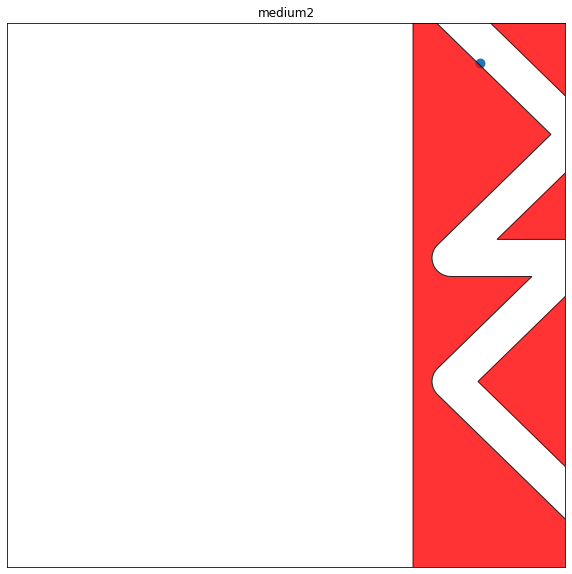

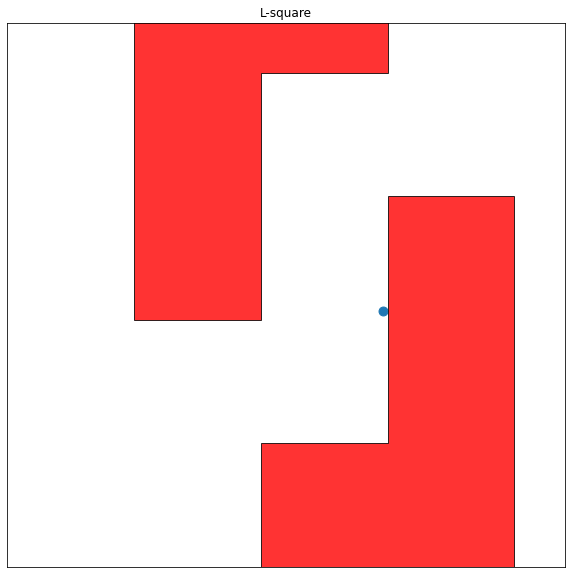

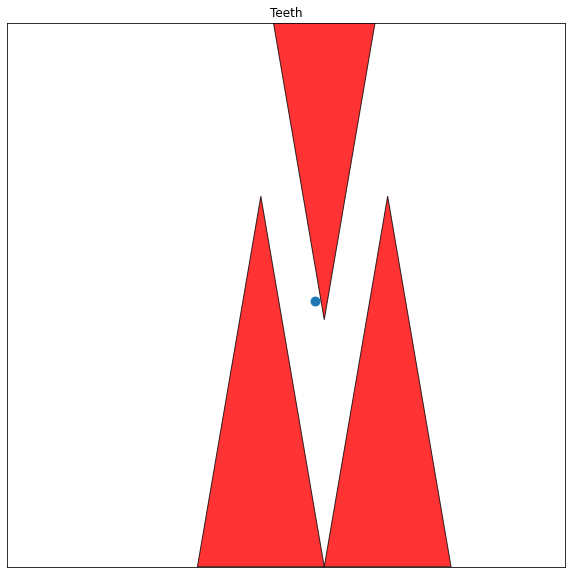

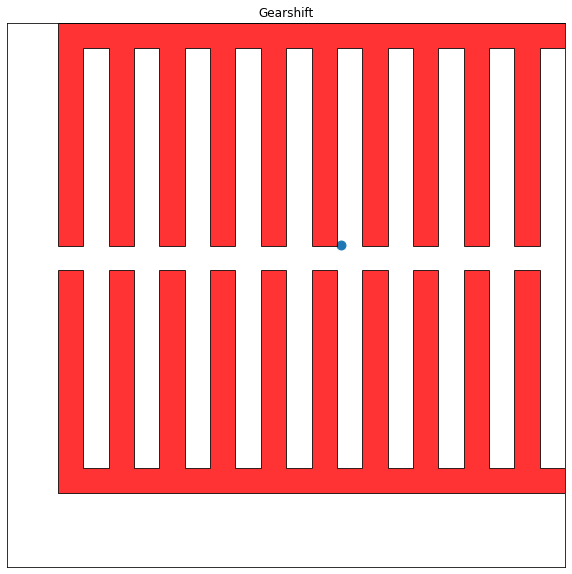

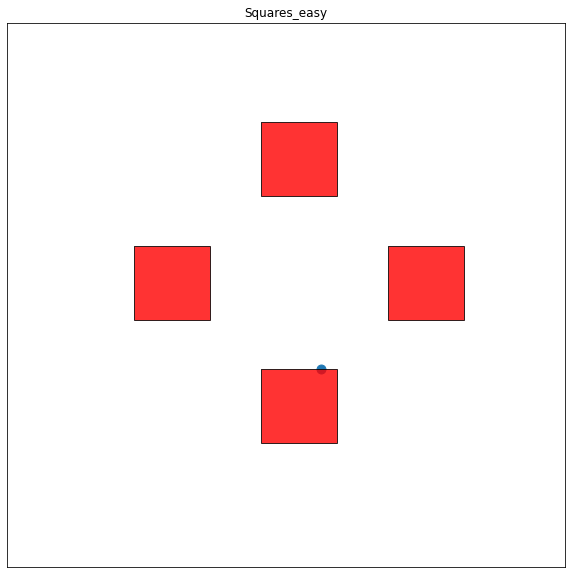

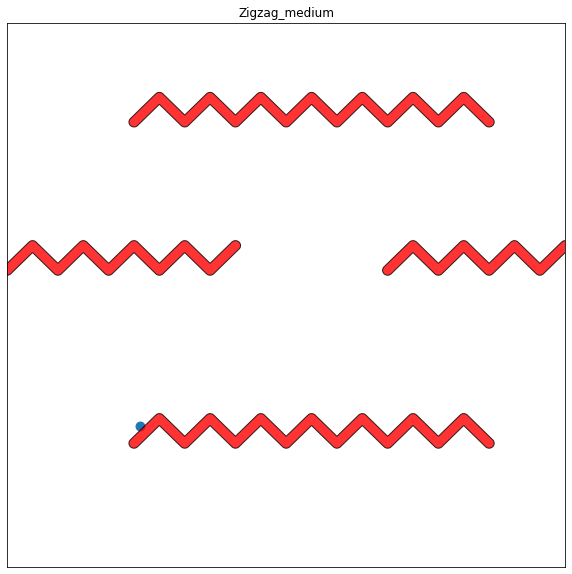

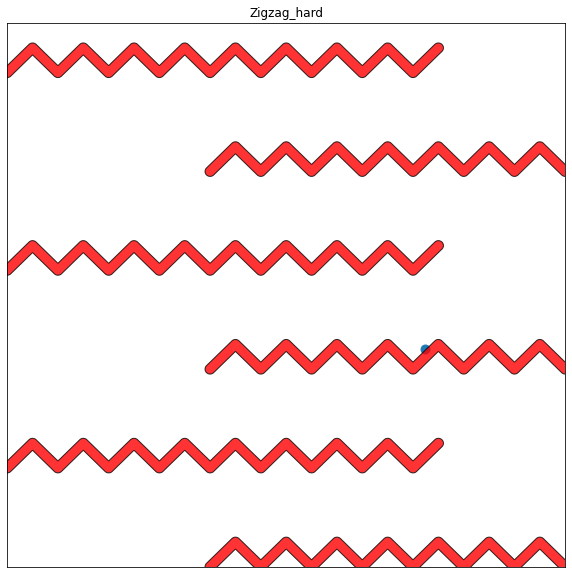

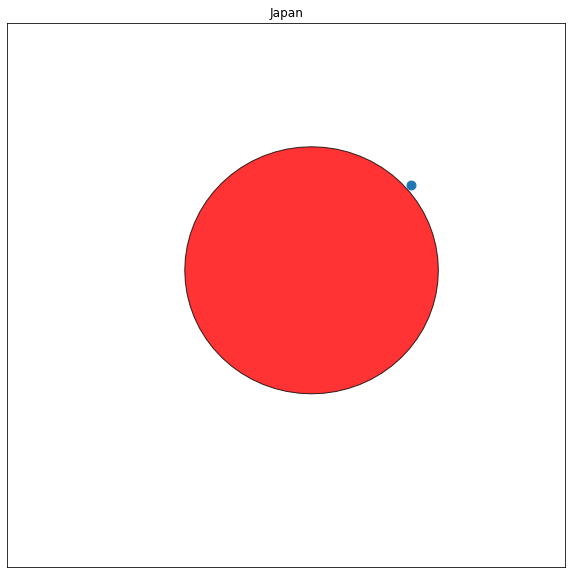

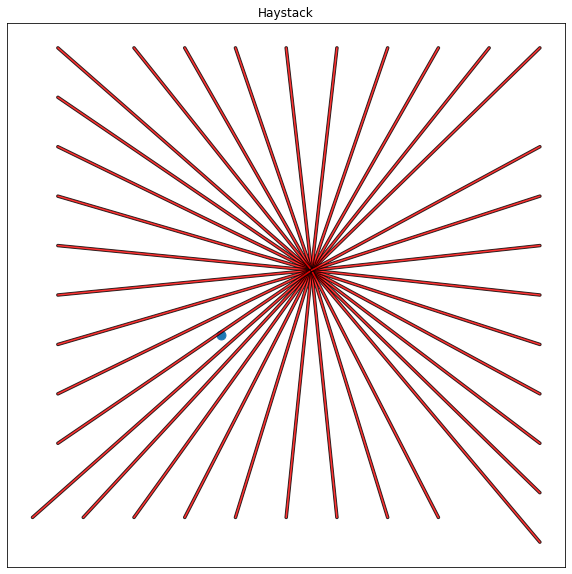

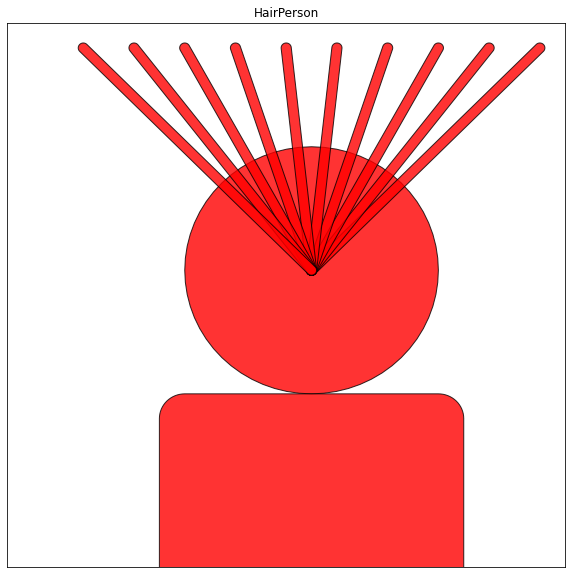

In [3]:
temp_list=IPTestSuite.benchList[5:]

config = {}
config['radius'] = 5.0
config['numNodes'] = 300

for benchmark in temp_list:
    try:
        print ("Planning: ", benchmark.name)
        collChecker = benchmark.collisionChecker
        gauss = GaussianPRM(collChecker)
        solution = gauss.planPath([benchmark.startList[0]],[benchmark.goalList[0]], config)
        print(solution, len(solution))
        print(len(gauss.graph.nodes()))
        
    except Exception as e:
        solution = []
        print ("Failed", e)
    # draw the planning
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    limits=collChecker.getEnvironmentLimits()
    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_title(benchmark.name)
    basicPRMVisualize(gauss.graph, collChecker,solution,nodeSize=80,ax=ax)